In [ ]:
pip install pybamm

In [2]:
import pybamm

In [ ]:
parameter_values = pybamm.ParameterValues('Chen2020')
spm = pybamm.lithium_ion.SPM({'SEI': 'ec reaction limited'})
parameter_values.set_initial_stoichiometries(1)

In [4]:
charge_rates = ['C/10', 'C/5', 'C/2', '1C', '2C']
experiments = {}
sims = {}
sols = {}

In [5]:
for i in range(len(charge_rates)):
  experiments['C rate: ' + charge_rates[i]] = pybamm.Experiment([
      ('Discharge at C/10 until 3V',
       'Rest for 1 hour',
       'Charge at ' + charge_rates[i] + ' until 4.2V',
       'Hold at 4.2V until C/50')
  ] * 20)
  sims['sim ' + str(i+1)] = pybamm.Simulation(spm, experiment=experiments['C rate: ' + charge_rates[i]], parameter_values=parameter_values)
  sols['sol ' + str(i+1)] = sims['sim ' + str(i+1)].solve()

interactive(children=(FloatSlider(value=0.0, description='t', max=329.61127075843774, step=3.2961127075843772)…

interactive(children=(FloatSlider(value=0.0, description='t', max=264.4163734706849, step=2.644163734706849), …

interactive(children=(FloatSlider(value=0.0, description='t', max=226.78487304323656, step=2.2678487304323656)…

interactive(children=(FloatSlider(value=0.0, description='t', max=217.15053728318998, step=2.1715053728319), O…

interactive(children=(FloatSlider(value=0.0, description='t', max=214.35878176358912, step=2.143587817635891),…

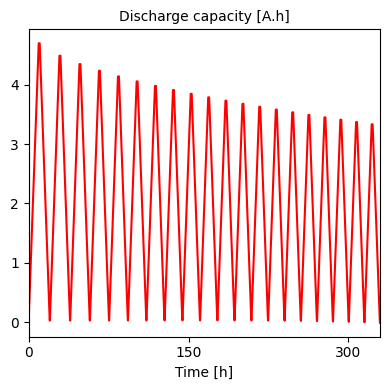

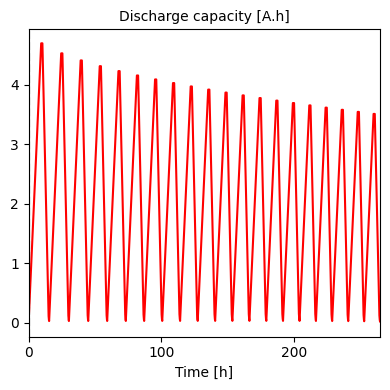

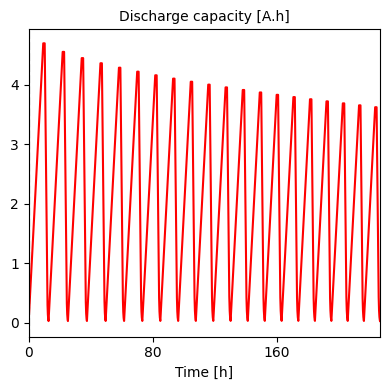

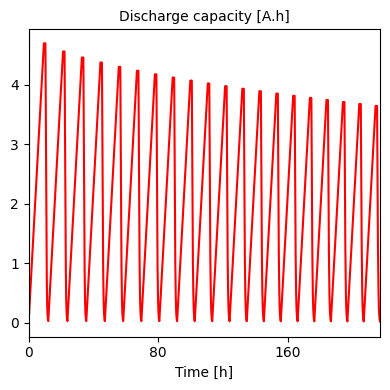

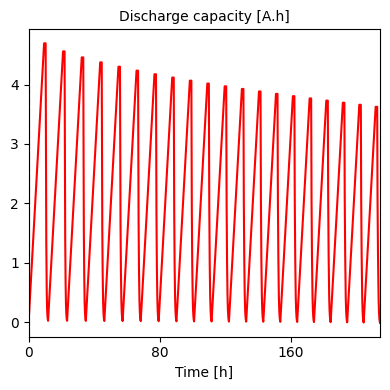

In [6]:
for i in range(len(sims)):
  sims['sim ' + str(i+1)].plot(['Discharge capacity [A.h]'])

In [8]:
import numpy as np

In [9]:
cycles = {}
for i in range(len(sols)):
  batt_runtime = len(sols['sol ' + str(i+1)].cycles)
  cycles['Exp. ' + str(i+1)] = np.linspace(1,batt_runtime,len(sols['sol ' + str(i+1)]['Time [h]'].entries))

In [10]:
capacities = {}
for i in range(len(sols)):
  capacities['Exp. ' + str(i+1)] = sols['sol ' + str(i+1)]['Discharge capacity [A.h]'].entries

In [142]:
from scipy import signal
import matplotlib.pyplot as plt

Text(0, 0.5, 'Normalized capacity [A.h]')

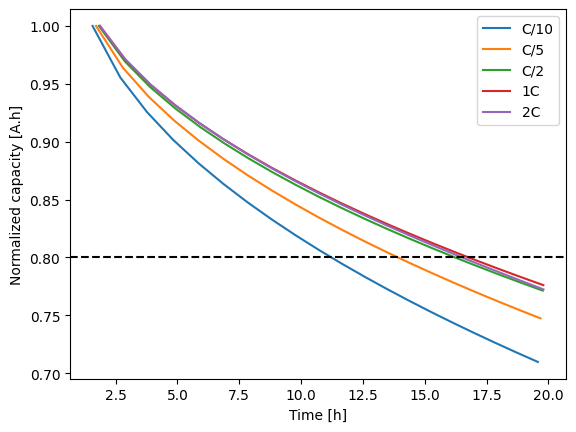

In [143]:
peaks1, _1 = signal.find_peaks(capacities['Exp. 1'])
peaks2, _2 = signal.find_peaks(capacities['Exp. 2'])
peaks3, _3 = signal.find_peaks(capacities['Exp. 3'])
peaks4, _4 = signal.find_peaks(capacities['Exp. 4'])
peaks5, _5 = signal.find_peaks(capacities['Exp. 5'])

time1 = cycles['Exp. 1'][peaks1]
caps1 = capacities['Exp. 1'][peaks1]
caps1 = caps1 / np.max(caps1)

time2 = cycles['Exp. 2'][peaks2]
caps2 = capacities['Exp. 2'][peaks2]
caps2 = caps2 / np.max(caps2)

time3 = cycles['Exp. 3'][peaks3]
caps3 = capacities['Exp. 3'][peaks3]
caps3 = caps3 / np.max(caps3)

time4 = cycles['Exp. 4'][peaks4]
caps4 = capacities['Exp. 4'][peaks4]
caps4 = caps4 / np.max(caps4)

time5 = cycles['Exp. 5'][peaks5]
caps5 = capacities['Exp. 5'][peaks5]
caps5 = caps5 / np.max(caps5)

plt.plot(time1,caps1)
plt.plot(time2,caps2)
plt.plot(time3,caps3)
plt.plot(time4,caps4)
plt.plot(time5,caps5)
plt.legend(['C/10','C/5','C/2','1C','2C'])
plt.axhline(y = 0.8, color = 'k', linestyle = '--')
plt.xlabel('Time [h]')
plt.ylabel('Normalized capacity [A.h]')